# IMPORTING_LIBRARIES

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import  adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from  statsmodels.tsa.arima_model import ARIMA
from  statsmodels.tsa.statespace.sarimax import SARIMAX

c:\users\aviraj battan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\users\aviraj battan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# DATA_PREPROCESSING 

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
data = pd.read_csv("C:\Downloads\Electric_Production.csv")

In [4]:
data.columns = [ "Date" , "Production" ]
data.head(10)

,Date,Production
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
5,6/1/1985,58.0904
6,7/1/1985,62.6202
7,8/1/1985,63.2485
8,9/1/1985,60.5846
9,10/1/1985,56.3154


In [5]:
data.index = pd.to_datetime(data.Date)
data = data.drop("Date", axis =1)
data.head(10)

,Production
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904
1985-07-01,62.6202
1985-08-01,63.2485
1985-09-01,60.5846


In [6]:
print("INFORMATION OF DATA \n")
info = pd.DataFrame(data.info())
print(info)
print("\n")
print("ROWS AND COLUMN")
print(data.shape)

INFORMATION OF DATA 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Production  397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB
Empty DataFrame
Columns: []
Index: []


ROWS AND COLUMN
(397, 1)


In [7]:
print("NULL VALUES IN GIVEN DATA \n")
pd.DataFrame(data.isnull().sum() , columns= ["Null_values"])

NULL VALUES IN GIVEN DATA 



,Null_values
Production,0


In [8]:
data["Year"] = [d.year for d in data.index]

In [9]:
data["Month"]  = [d.month for d in data.index]

In [10]:
data.head(10)

,Production,Year,Month
Date,,,
1985-01-01,72.5052,1985,1
1985-02-01,70.6720,1985,2
1985-03-01,62.4502,1985,3
1985-04-01,57.4714,1985,4
1985-05-01,55.3151,1985,5
1985-06-01,58.0904,1985,6
1985-07-01,62.6202,1985,7
1985-08-01,63.2485,1985,8
1985-09-01,60.5846,1985,9


# DATA_ANALYSIES

In [11]:
print("STARTING YEAR")
print(np.min(data.Year))
print("THIS DATA Is Till")
print(np.max(data.Year))

STARTING YEAR
1985
THIS DATA Is Till
2018


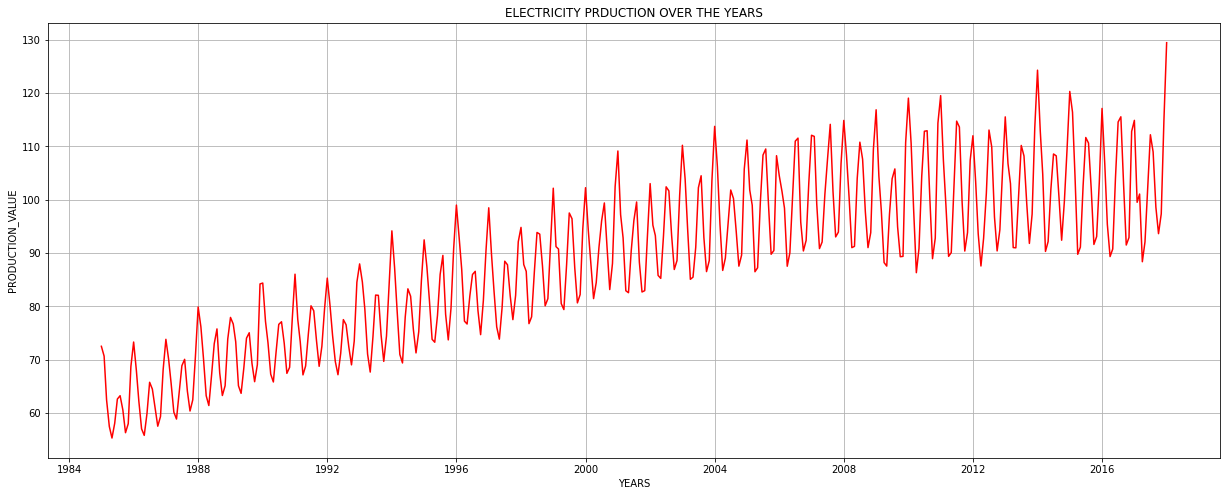

In [12]:
plt.figure(figsize=(21,8))
plt.grid(True)
plt.title("ELECTRICITY PRDUCTION OVER THE YEARS")
plt.xlabel("YEARS")
plt.ylabel("PRODUCTION_VALUE")
plt.plot(data["Production"] , "r")

In [13]:
data.groupby("Year")["Production"].mean().reset_index()

,Year,Production
0,1985,62.165667
1,1986,62.709892
2,1987,65.740275
3,1988,69.716358
4,1989,71.895167
5,1990,73.313433
6,1991,75.111850
7,1992,75.120908
8,1993,77.678992
9,1994,79.255058


In [14]:
data.groupby("Year")["Production"].sum().reset_index()

,Year,Production
0,1985,745.9880
1,1986,752.5187
2,1987,788.8833
3,1988,836.5963
4,1989,862.7420
5,1990,879.7612
6,1991,901.3422
7,1992,901.4509
8,1993,932.1479
9,1994,951.0607


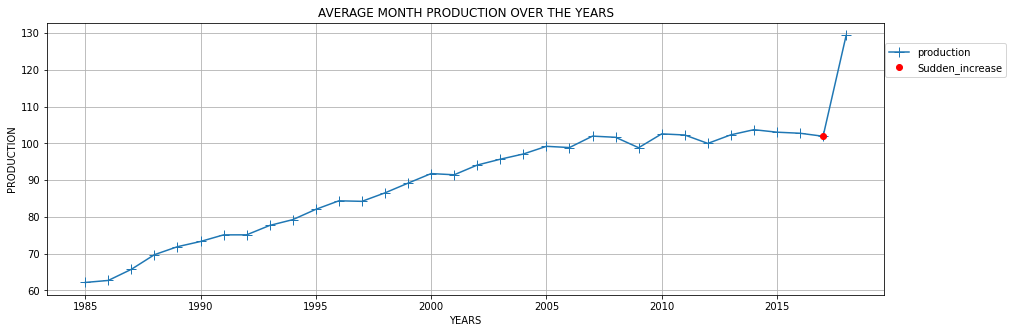

In [15]:
plt.figure(figsize = (15,5))
plt.grid(True)
plt.plot(data.groupby("Year")["Production"].mean() ,marker = "+" , ms  = 10 , label = "production")
plt.plot(2017 ,101.944842, "ro" , label = "Sudden_increase")
plt.title("AVERAGE MONTH PRODUCTION OVER THE YEARS" )
plt.xlabel("YEARS")
plt.ylabel("PRODUCTION")
plt.legend(loc = (1.001,0.8))

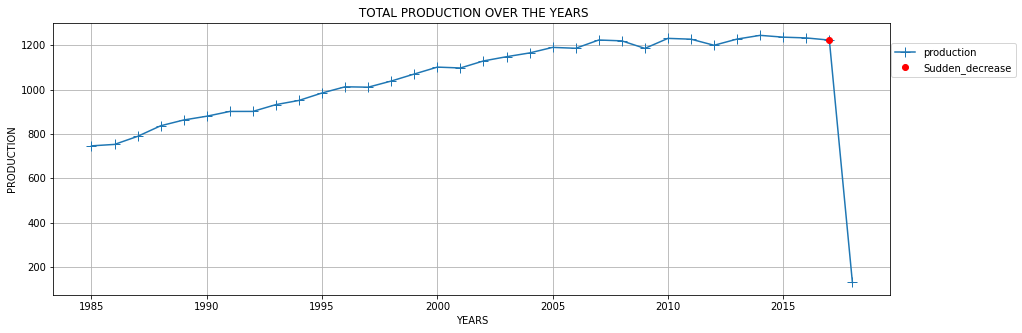

In [16]:
plt.figure(figsize = (15,5))
plt.grid(True)
plt.plot(data.groupby("Year")["Production"].sum() ,marker = "+" , ms  = 10 , label = "production")
plt.plot(2017 ,1223.3381, "ro" , label = "Sudden_decrease")
plt.title(" TOTAL PRODUCTION OVER THE YEARS" )
plt.xlabel("YEARS")
plt.ylabel("PRODUCTION")
plt.legend(loc = (1.001,0.8))

In [17]:
month_value = data.Month.unique()
year_value  = data.Year.unique()

#### PLOTING PRODUCTION ACCORDING TO RESPECTIVE YEAR

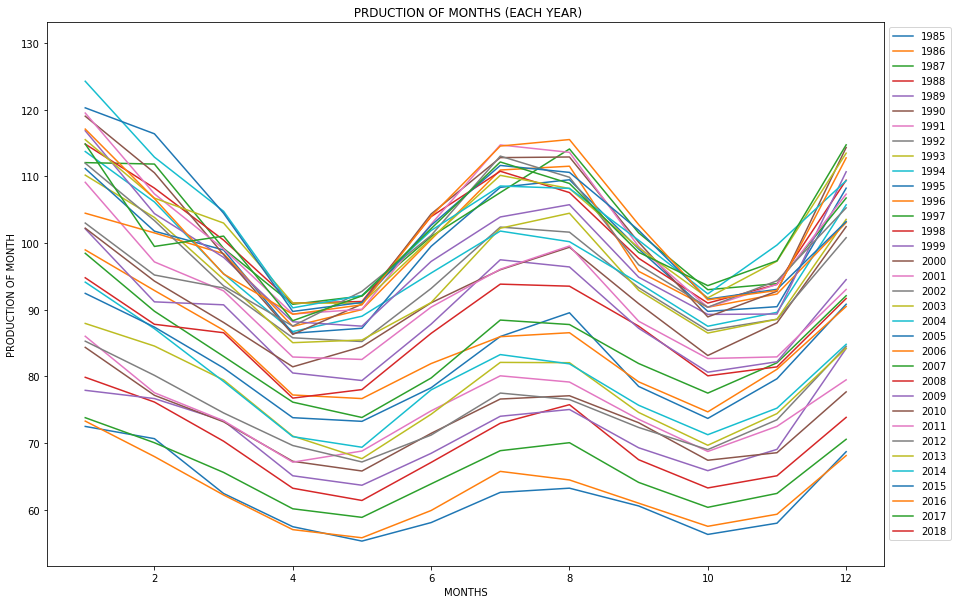

In [18]:
plt.figure(figsize = (15,10))
label = []
for i in year_value:
    plt.plot(data[ data["Year"] == i ].Month ,data[ data["Year"] == i ].Production)
plt.ylabel("PRODUCTION OF MONTH")
plt.xlabel("MONTHS")
plt.title(" PRDUCTION OF MONTHS (EACH YEAR)")
plt.legend( year_value, bbox_to_anchor = [1,1] )


In [19]:
mean_value = []
median_value = []
for i in month_value:
    mean_value.append(data[data["Month"]==i].Production.mean().round(2))
    median_value.append(data[data["Month"]==i].Production.median().round(2))

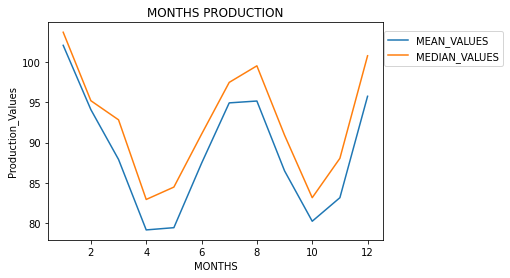

In [20]:
plt.plot(month_value,mean_value, label = "MEAN_VALUES")
plt.plot(month_value,median_value ,label = "MEDIAN_VALUES")
plt.ylabel("Production_Values")
plt.xlabel("MONTHS")
plt.title("MONTHS PRODUCTION")
plt.legend(loc=(1.005,0.8))

In [21]:
for i in month_value:
    print(  np.str(i) + " Month Mean value is  -  " + np.str(data[data["Month"]==i].Production.mean().round(2)))
    

1 Month Mean value is  -  102.1
2 Month Mean value is  -  94.1
3 Month Mean value is  -  87.9
4 Month Mean value is  -  79.13
5 Month Mean value is  -  79.41
6 Month Mean value is  -  87.42
7 Month Mean value is  -  94.94
8 Month Mean value is  -  95.17
9 Month Mean value is  -  86.48
10 Month Mean value is  -  80.21
11 Month Mean value is  -  83.14
12 Month Mean value is  -  95.76


<ipython-input-21-e0612a1fd320>:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(  np.str(i) + " Month Mean value is  -  " + np.str(data[data["Month"]==i].Production.mean().round(2)))


In [22]:
for i in month_value:
    print(  np.str(i) + " month median value is  -  " + np.str(data[data["Month"]==i].Production.median().round(2)))

1 month median value is  -  103.73
2 month median value is  -  95.21
3 month median value is  -  92.83
4 month median value is  -  82.92
5 month median value is  -  84.46
6 month median value is  -  91.04
7 month median value is  -  97.49
8 month median value is  -  99.55
9 month median value is  -  90.92
10 month median value is  -  83.14
11 month median value is  -  88.04
12 month median value is  -  100.8


<ipython-input-22-87b890070c42>:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(  np.str(i) + " month median value is  -  " + np.str(data[data["Month"]==i].Production.median().round(2)))
<ipython-input-22-87b890070c42>:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(  np.str(i) + " month median value is  -  " + np.str(data[data["Month"]==i].P

# CHECKING_FOR_OUTLIERS

<AxesSubplot:xlabel='Year', ylabel='Production'>

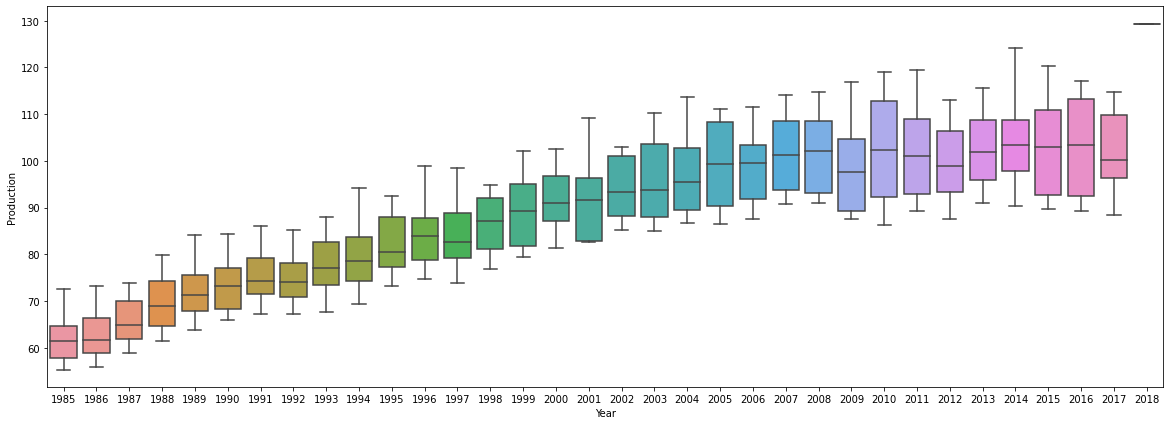

In [23]:
plt.figure(figsize=(20,7))
sn.boxplot(x="Year", y = "Production" , data = data)

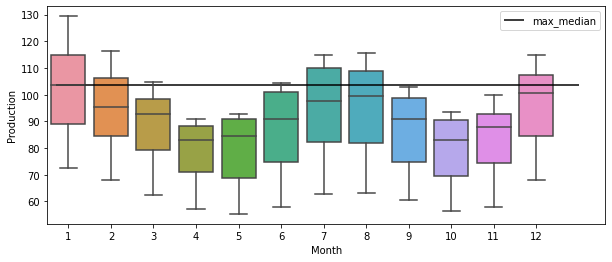

In [24]:
plt.figure(figsize=(10,4))
sn.boxplot(x="Month",y="Production" , data = data)
md = np.max(median_value)
plt.hlines(y = md,xmin = -0.3 , xmax=12 , color = "black" , label = "max_median")
plt.legend()

# CHECKING_STATIONARY_STATUS

In [25]:
def adfTest(series):
    values = adfuller(series,autolag = None)
    vFrame = pd.Series(values[0:4],index = ["Test_st." , "P-Values" , "Lags_used" , "Obs._used"])
    print(vFrame)
    if values[1]>= 0.05:
        print("SERIES IS NOT STATIONARY")
    else:
        print("SERIES IS STATIONARY")

In [26]:
adfTest(data["Production"])

Test_st.      -2.419984
P-Values       0.136175
Lags_used     17.000000
Obs._used    379.000000
dtype: float64
SERIES IS NOT STATIONARY


# Checking seasonality , trends for Non stationary

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
 dcp = seasonal_decompose(data["Production"],model = "multiplicative",freq = 12)

<ipython-input-28-e8df223bff0d>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead.
  dcp = seasonal_decompose(data["Production"],model = "multiplicative",freq = 12)


Text(0.5, 1.0, 'OBSERVED')

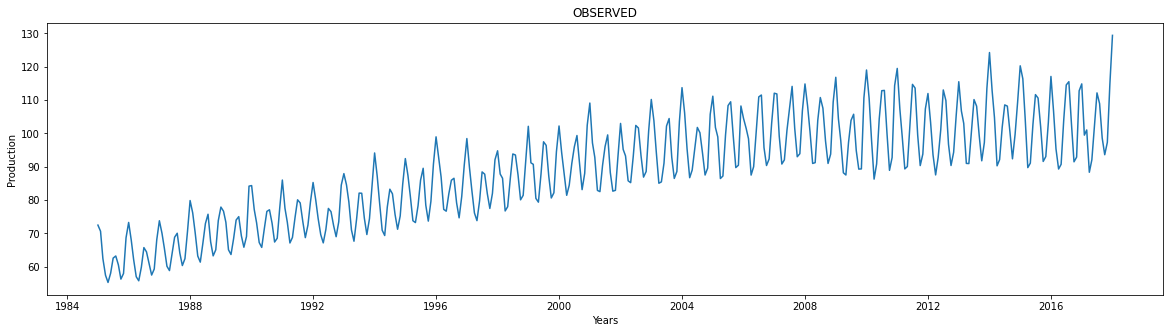

In [29]:
plt.figure(figsize=(20,5))
plt.plot(dcp.observed)
plt.xlabel("Years")
plt.ylabel("Production")
plt.title("OBSERVED")

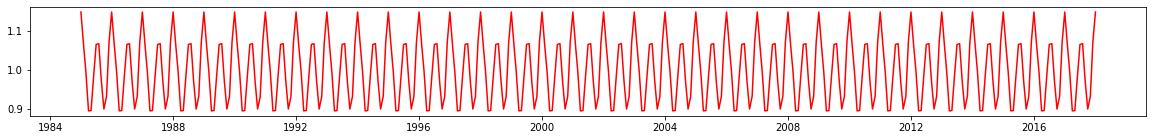

In [30]:
plt.figure(figsize=(20,2))
plt.plot(dcp.seasonal ,"r")

Text(0.5, 1.0, 'Trend')

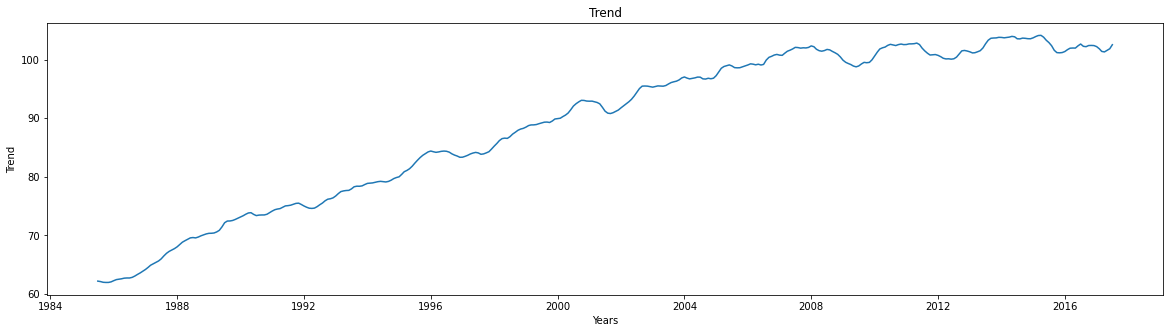

In [31]:
plt.figure(figsize=(20,5))
plt.plot(dcp.trend)
plt.xlabel("Years")
plt.ylabel("Trend")
plt.title("Trend")

# MAKING_DATA_STATIONARY

In [32]:
data["Diff_1"] = data["Production"] - data["Production"].shift(12)

In [33]:
data.head(15)

,Production,Year,Month,Diff_1
Date,,,,
1985-01-01,72.5052,1985,1,NaN
1985-02-01,70.6720,1985,2,NaN
1985-03-01,62.4502,1985,3,NaN
1985-04-01,57.4714,1985,4,NaN
1985-05-01,55.3151,1985,5,NaN
1985-06-01,58.0904,1985,6,NaN
1985-07-01,62.6202,1985,7,NaN
1985-08-01,63.2485,1985,8,NaN
1985-09-01,60.5846,1985,9,NaN


In [34]:
adfTest(data["Diff_1"].dropna())

Test_st.      -4.246309
P-Values       0.000550
Lags_used     17.000000
Obs._used    367.000000
dtype: float64
SERIES IS STATIONARY


# PACF and ACF values

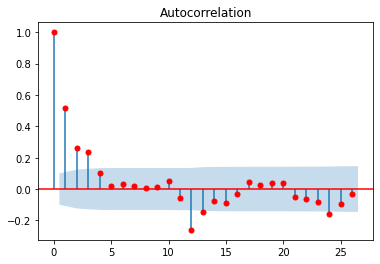

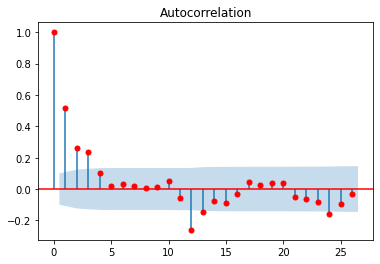

In [35]:
plot_acf(data["Diff_1"].dropna() , color = "red")

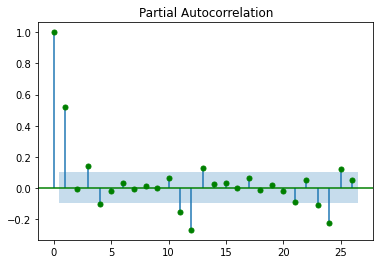

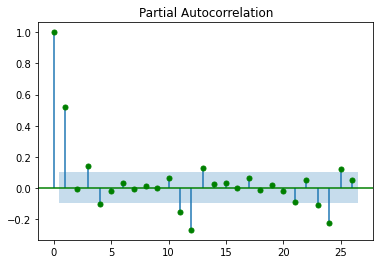

In [36]:
plot_pacf(data["Diff_1"].dropna(), color = "green")

# Accuracy Function

In [37]:
def get_mape(actual,predicted):
    y_true,y_pred = np.array(actual),np.array(predicted)
    return np.round(np.mean(np.abs((actual - predicted)/actual))*100,2)

# AR_MODEL

In [38]:
model= ARIMA(data["Production"][:300], order = (4,1,0))

c:\users\aviraj battan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\aviraj battan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueW

In [39]:
m_fit = model.fit()

In [40]:
m_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Production   No. Observations:                  299
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -814.749
Method:                       css-mle   S.D. of innovations              3.670
Date:                Sat, 04 Jun 2022   AIC                           1641.498
Time:                        12:27:44   BIC                           1663.701
Sample:                    02-01-1985   HQIC                          1650.385
                         - 12-01-2009                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1286      0.090      1.432      0.152      -0.047       0.304
ar.L1.D.Production    -0.0227      0.053     -0.428      0.669      -0.127       0.081
ar.L2.D.Production    -0.4367      0.045     -9.636      0.000      -0.525      -0.348
ar.L3.D.Production    -0.4845      0.045    -10.770      0.000      -0.573      -0.396
ar.L4.D.Production    -0.4347      0.053     -8.177      0.000      -0.539      -0.330
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5169           -0.8929j            1.0317           -0.1665
AR.2            0.5169           +0.8929j            1.0317            0.1665
AR.3           -1.0742           -1.0037j            1.4701           -0.3804
AR.4           -1.0742           +1.0037j            1.4701            0.3804
-----------------------------------------------------------------------------
"""

In [41]:
m_fit.forecast(150)[0][:98]

array([117.90788311, 111.13509432,  98.08239868,  88.87279685,
        95.22890277, 108.6793992 , 116.03944427, 111.22840326,
        99.15039003,  92.41913239,  97.28353554, 108.36076863,
       114.80178955, 110.69336261, 100.79887526,  95.18803066,
        99.13257321, 108.37820061, 113.77058598, 110.44442217,
       102.2772645 ,  97.58976333, 100.83588562, 108.51731894,
       113.05206794, 110.36543735, 103.61964098,  99.71599181,
       102.38659612, 108.77222766, 112.59015014, 110.4237453 ,
       104.85708356, 101.61000703, 103.81035284, 109.12258116,
       112.33961272, 110.59801468, 106.00853131, 103.31144473,
       105.12797533, 109.55069543, 112.26433162, 110.86947333,
       107.08970269, 104.85333275, 106.35664609, 110.04230247,
       112.33429459, 111.22235285, 108.11350506, 106.26300535,
       107.51079263, 110.58573929, 112.52461347, 111.64344045,
       109.09048564, 107.56311964, 108.60251392, 111.17147078,
       112.81466039, 112.1216585 , 110.02926406, 108.77

In [42]:
data["AR_Pred."] = m_fit.predict(start=300,end=500,dynamic=True)

In [43]:
AR = get_mape(data["Production"][300:] , m_fit.forecast(97)[0])
print(AR)

8.11


<AxesSubplot:xlabel='Date'>

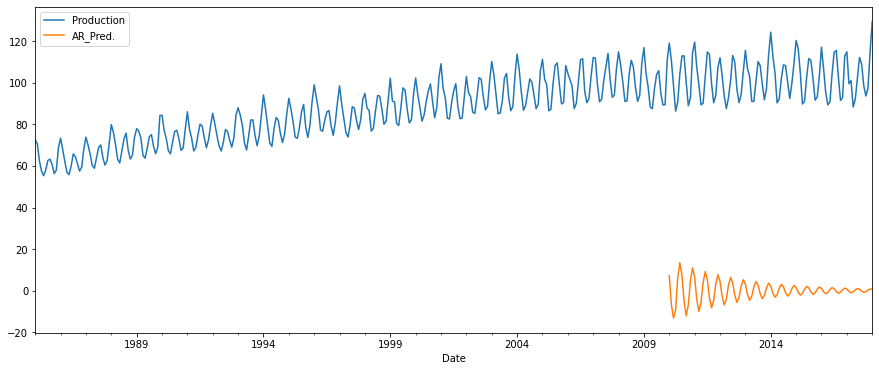

In [44]:
data[["Production" , "AR_Pred."]].plot(figsize=(15,6))

In [45]:
model2= ARIMA(data["Production"][:300], order = (6,2,0))

c:\users\aviraj battan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\aviraj battan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueW

In [46]:
m_fit2 = model.fit()

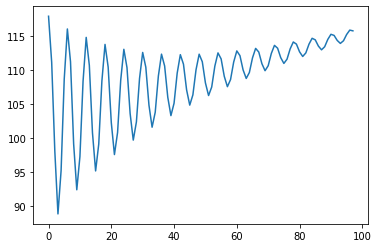

In [47]:
plt.plot(m_fit2.forecast(98)[0])

In [48]:
get_mape(data["Production"][300:] , m_fit2.forecast(97)[0])

8.11

# MOVING_AVERAGE model

In [49]:
model3= ARIMA(data["Production"][:300], order = (0,1,5))

c:\users\aviraj battan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\aviraj battan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueW

In [50]:
m_fit3= model3.fit()

In [51]:
data["MA_Pred."] = m_fit3.predict(start=300,end=500,dynamic=True)
MA = get_mape(data["Production"][300:] , m_fit3.forecast(97)[0])
print(MA)

9.01


In [52]:
MA = get_mape(data["Production"][300:] , m_fit3.forecast(97)[0])
print(MA)

9.01


<AxesSubplot:xlabel='Date'>

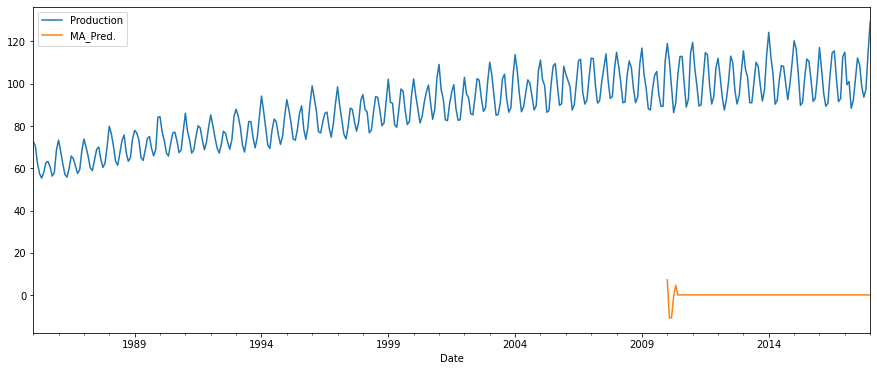

In [53]:
data[["Production" , "MA_Pred."]].plot(figsize=(15,6))

In [54]:
m_fit3.forecast(150)[0][:98]

array([117.90797433, 107.12961999,  96.42970651,  95.8144946 ,
       100.51410091, 100.64297571, 100.7718505 , 100.90072529,
       101.02960008, 101.15847487, 101.28734966, 101.41622445,
       101.54509924, 101.67397403, 101.80284882, 101.93172361,
       102.0605984 , 102.18947319, 102.31834798, 102.44722277,
       102.57609756, 102.70497235, 102.83384715, 102.96272194,
       103.09159673, 103.22047152, 103.34934631, 103.4782211 ,
       103.60709589, 103.73597068, 103.86484547, 103.99372026,
       104.12259505, 104.25146984, 104.38034463, 104.50921942,
       104.63809421, 104.766969  , 104.8958438 , 105.02471859,
       105.15359338, 105.28246817, 105.41134296, 105.54021775,
       105.66909254, 105.79796733, 105.92684212, 106.05571691,
       106.1845917 , 106.31346649, 106.44234128, 106.57121607,
       106.70009086, 106.82896565, 106.95784045, 107.08671524,
       107.21559003, 107.34446482, 107.47333961, 107.6022144 ,
       107.73108919, 107.85996398, 107.98883877, 108.11

In [55]:
get_mape(data["Production"][300:] , m_fit3.forecast(97)[0])

9.01

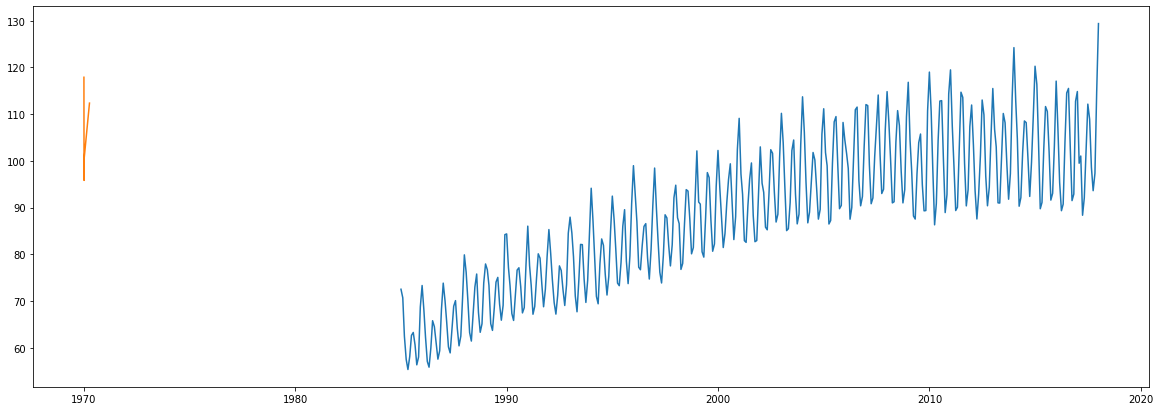

In [57]:
plt.figure(figsize = (20,7))
plt.plot(data["Production"])
plt.plot(m_fit3.forecast(97)[0])

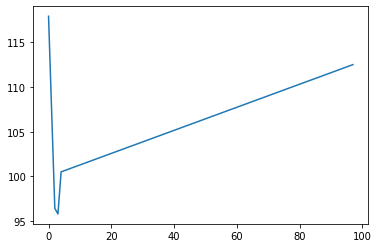

In [93]:
plt.plot(prid)

In [60]:
model4= ARIMA(data["Production"][:300], order = (0,1,5))

c:\users\aviraj battan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\aviraj battan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueW

In [61]:
m_fit4 = model4.fit()

# ARIMA model

In [75]:
model5= ARIMA(data["Production"][:300], order = (4,1,2))

c:\users\aviraj battan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\aviraj battan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueW

In [ ]:
m_fit5 = model5.fit()

In [74]:
data["A_Pred."] = m_fit5.predict(start=300,end=500,dynamic=True)
A = get_mape(data["Production"][300:] , m_fit5.forecast(97)[0])
print(A)

NameError: name 'm_fit5' is not defined

<AxesSubplot:xlabel='Date'>

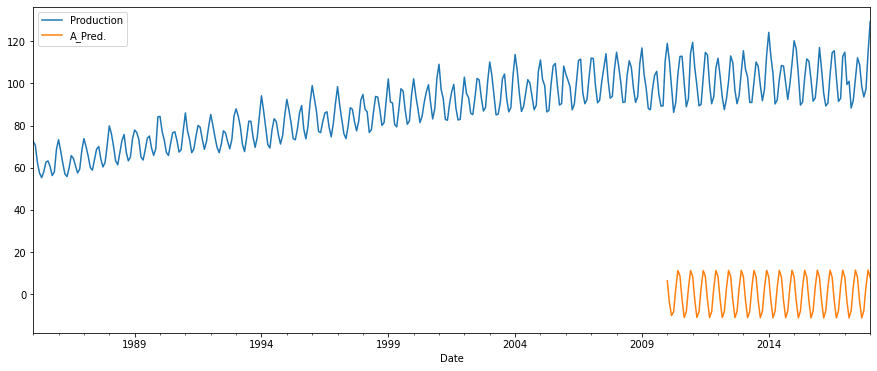

In [69]:
data[["Production" , "A_Pred."]].plot(figsize=(15,6))

In [89]:
m_fit5.forecast(97)[0]

array([117.10080208, 113.08092726, 102.94038427,  94.62230756,
        97.14040441, 108.39382433, 116.99731817, 114.41919125,
       103.3854315 ,  95.0340939 ,  97.81987008, 109.0532635 ,
       117.57969639, 114.95465149, 103.9043752 ,  95.59403016,
        98.4441593 , 109.69672884, 118.17761338, 115.48886317,
       104.42034893,  96.1553534 ,  99.06907471, 110.33979297,
       118.77518548, 116.02287174, 104.93639262,  96.71702347,
        99.69426153, 110.9827671 , 119.37240118, 116.55661613,
       105.45252749,  97.27904882, 100.31971214, 111.62564924,
       119.9692612 , 117.09009744, 105.96875539,  97.84143012,
       100.9454251 , 112.26843735, 120.565765  , 117.62331713,
       106.48507833,  98.40416792, 101.57139894, 112.91112942,
       121.16191203, 118.15627668, 107.00149832,  98.96726274,
       102.19763218, 113.55372343, 121.75770177, 118.68897758,
       107.51801736,  99.53071512, 102.82412333, 114.19621739,
       122.3531337 , 119.2214213 , 108.03463746, 100.09

In [90]:
get_mape(data["Production"][300:] , m_fit5.forecast(97)[0])

7.77

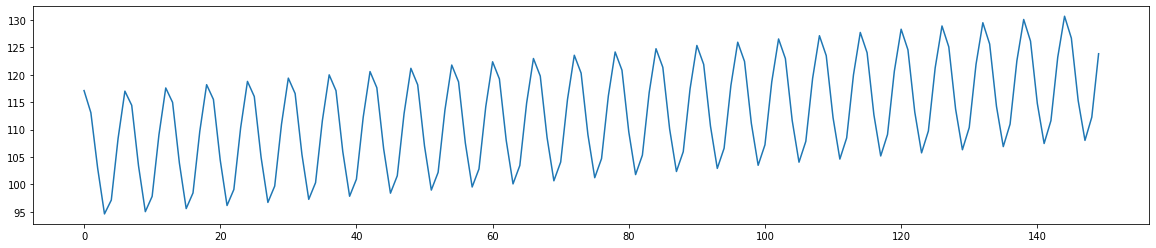

In [91]:
plt.figure(figsize = (20,4))
plt.plot(m_fit5.forecast(150)[0])

# Sarimax

In [64]:
model6 = SARIMAX(data["Production"][:300], order = (4,1,2),seasonal_order = (4,1,2,12))

c:\users\aviraj battan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\aviraj battan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [65]:
m6=model6.fit()

c:\users\aviraj battan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\aviraj battan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\aviraj battan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [69]:
data["S_pred."] = m6.predict(start=300,end=500,dynamic=True)

In [70]:
S = get_mape(data["Production"][300:] , m6.forecast(97))
print(S)

3.1


<AxesSubplot:xlabel='Date'>

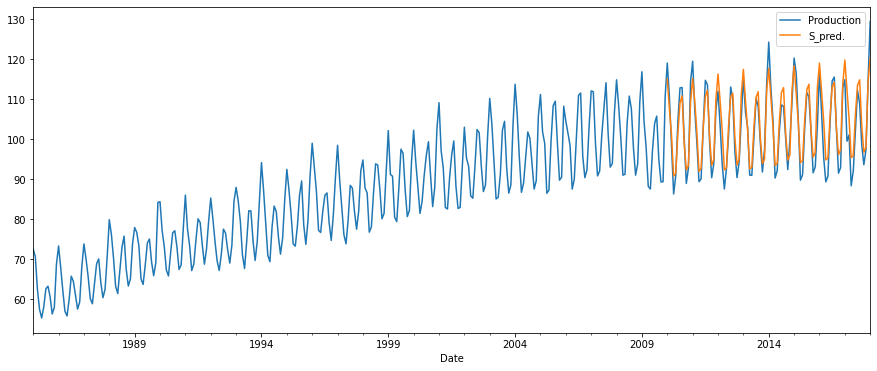

In [71]:
data[["Production" , "S_pred."]].plot(figsize=(15,6))

# RESULT OF ACCURACY

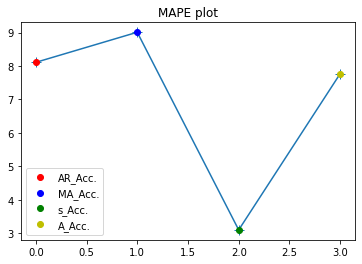

In [86]:
plt.plot([AR , MA ,S ,A] , marker = "+" , ms = 10)
plt.plot(0,AR , "ro" , label = "AR_Acc.")
plt.plot(1,MA , "bo" , label = "MA_Acc.")
plt.plot(2,S , "go" , label = "s_Acc.")
plt.plot(3,A , "yo" , label = "A_Acc.")
plt.title("MAPE plot")
plt.legend()
